In [1]:
%matplotlib inline


# Incremental PCA

Incremental principal component analysis (IPCA) is typically used as a
replacement for principal component analysis (PCA) when the dataset to be
decomposed is too large to fit in memory. IPCA builds a low-rank approximation
for the input data using an amount of memory which is independent of the
number of input data samples. It is still dependent on the input data features,
but changing the batch size allows for control of memory usage.

This example serves as a visual check that IPCA is able to find a similar
projection of the data to PCA (to a sign flip), while only processing a
few samples at a time. This can be considered a "toy example", as IPCA is
intended for large datasets which do not fit in main memory, requiring
incremental approaches.


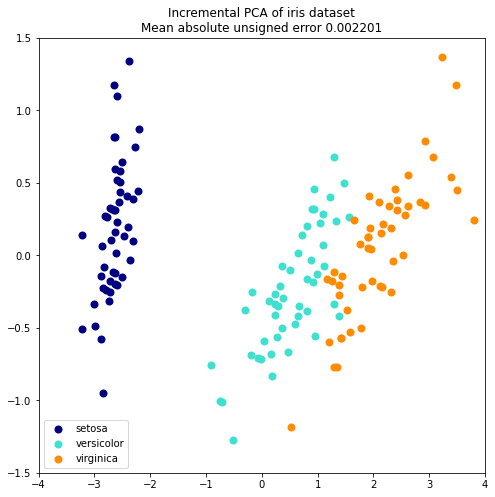

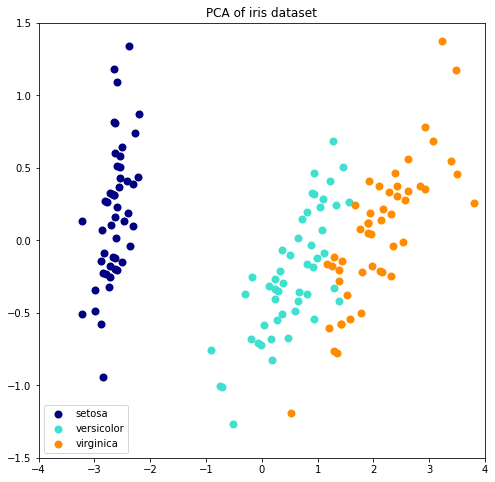

In [2]:
# Authors: Kyle Kastner
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color=color,
            lw=2,
            label=target_name,
        )

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()